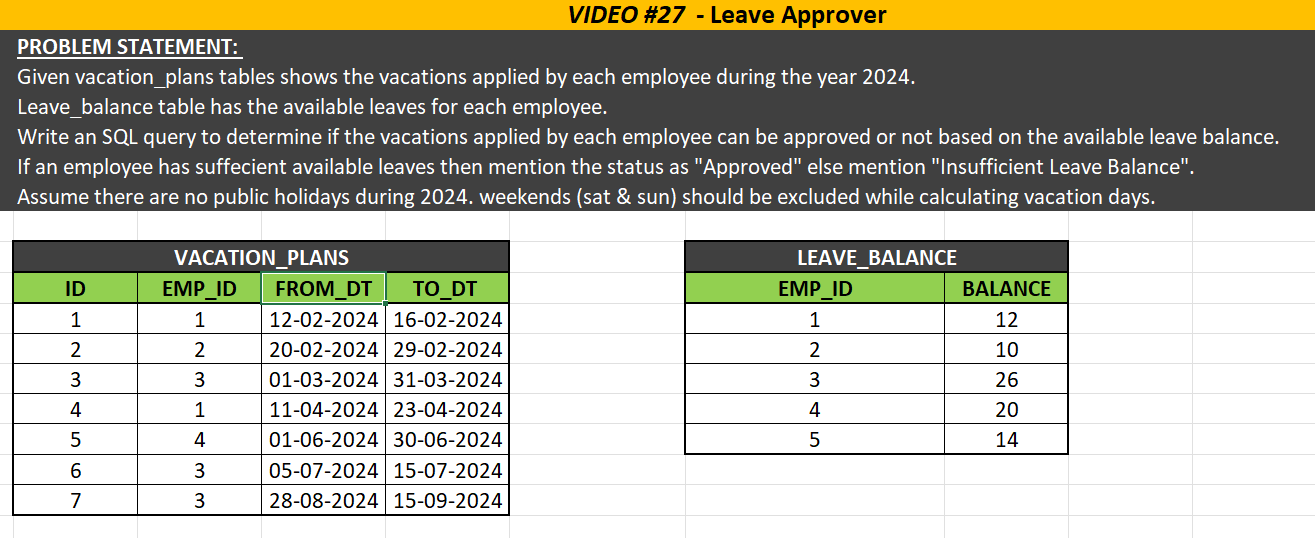

In [19]:
import pandas as pd

# Create a list of dictionaries based on the given table
data = [
    {"ID": 1, "EMP_ID": 1, "FROM_DT": "12-02-2024", "TO_DT": "16-02-2024"},
    {"ID": 2, "EMP_ID": 2, "FROM_DT": "20-02-2024", "TO_DT": "29-02-2024"},
    {"ID": 3, "EMP_ID": 3, "FROM_DT": "01-03-2024", "TO_DT": "31-03-2024"},
    {"ID": 4, "EMP_ID": 1, "FROM_DT": "11-04-2024", "TO_DT": "23-04-2024"},
    {"ID": 5, "EMP_ID": 4, "FROM_DT": "01-06-2024", "TO_DT": "30-06-2024"},
    {"ID": 6, "EMP_ID": 3, "FROM_DT": "05-07-2024", "TO_DT": "15-07-2024"},
    {"ID": 7, "EMP_ID": 3, "FROM_DT": "28-08-2024", "TO_DT": "15-09-2024"}
]

# Convert the list of dictionaries into a DataFrame
df = pd.DataFrame(data)

df["FROM_DT"] = pd.to_datetime(df["FROM_DT"], format="%d-%m-%Y")
df["TO_DT"] = pd.to_datetime(df["TO_DT"], format="%d-%m-%Y")
# Display the DataFrame
print(df)



   ID  EMP_ID    FROM_DT      TO_DT
0   1       1 2024-02-12 2024-02-16
1   2       2 2024-02-20 2024-02-29
2   3       3 2024-03-01 2024-03-31
3   4       1 2024-04-11 2024-04-23
4   5       4 2024-06-01 2024-06-30
5   6       3 2024-07-05 2024-07-15
6   7       3 2024-08-28 2024-09-15


In [20]:
# Function to calculate vacation days excluding weekends
def calculate_vacation_days(row):
    # Create a date range between FROM_DT and TO_DT
    date_range = pd.date_range(start=row["FROM_DT"], end=row["TO_DT"], freq='D')
    
    # Filter out weekends (Saturday = 5, Sunday = 6)
    weekdays = date_range[~date_range.weekday.isin([5, 6])]
    
    # Return the count of weekdays
    return len(weekdays)

# Apply the function to calculate vacation days for each row
df["VACATION_DAYS"] = df.apply(calculate_vacation_days, axis=1)
df

,ID,EMP_ID,FROM_DT,TO_DT,VACATION_DAYS
0,1,1,2024-02-12,2024-02-16,5
1,2,2,2024-02-20,2024-02-29,8
2,3,3,2024-03-01,2024-03-31,21
3,4,1,2024-04-11,2024-04-23,9
4,5,4,2024-06-01,2024-06-30,20
5,6,3,2024-07-05,2024-07-15,7
6,7,3,2024-08-28,2024-09-15,13


In [21]:
# Data
leave_balance = {
    1: 12,
    2: 10,
    3: 26,
    4: 20,
    5: 14
}

# Display the dictionary
print(leave_balance)


{1: 12, 2: 10, 3: 26, 4: 20, 5: 14}


In [22]:
def validate_leave(row):
    if row["VACATION_DAYS"]<=leave_balance[row["EMP_ID"]]:
        leave_balance[row["EMP_ID"]]=leave_balance[row["EMP_ID"]]-row["VACATION_DAYS"]
        return "Approved"
    else:
        return "Insufficient Leave Balance"
df["STATUS"]=df.apply(validate_leave,axis=1)
df.sort_values("STATUS")

,ID,EMP_ID,FROM_DT,TO_DT,VACATION_DAYS,STATUS
0,1,1,2024-02-12,2024-02-16,5,Approved
1,2,2,2024-02-20,2024-02-29,8,Approved
2,3,3,2024-03-01,2024-03-31,21,Approved
4,5,4,2024-06-01,2024-06-30,20,Approved
3,4,1,2024-04-11,2024-04-23,9,Insufficient Leave Balance
5,6,3,2024-07-05,2024-07-15,7,Insufficient Leave Balance
6,7,3,2024-08-28,2024-09-15,13,Insufficient Leave Balance


In [23]:
print(leave_balance)

{1: 7, 2: 2, 3: 5, 4: 0, 5: 14}
